In [ ]:
import numpy as np
import scipy as sp
import scipy.linalg
import matplotlib.pyplot as plt

# Observations préliminaires

In [ ]:
n = 1000
K = 3

c = [0.5,0.25,0.25]
M = np.eye(K)*3#.5 + np.ones((K,K))*0.5

classes = np.concatenate(([0]*(int(c[0]*n)),[1]*(int(c[1]*n)),[2]*(n - int(c[0]*n) - int(c[1]*n))))

q0 = 0.9
q = q0 * np.ones(n)
#q = np.array([np.random.uniform()]*n)
#q = np.maximum(0,np.minimum(1,q0 + np.random.uniform(low = -0.3,high = 0.3,size=n)))
#q = np.where(np.random.uniform(size = n) > 0.3, 0.1, 0.7)


In [ ]:
2*np.sqrt(1-q0**2)/(q0*c[0])

1.9372884193514102

[]

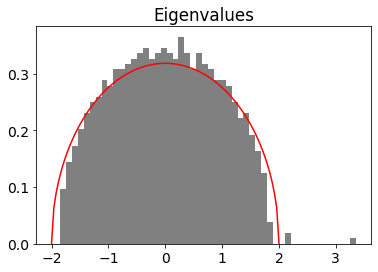

In [ ]:

A = np.zeros((n,n))

for i in range(n):
  for j in range(i, n):
    if np.random.uniform() < q[i]*q[j]*(1+M[classes[i],classes[j]]/np.sqrt(n)):
      A[i,j] = 1
      A[j,i] = 1

B = ( A - q.reshape(-1,1) @ q.reshape(1, -1) )

eig = sp.linalg.eig(B/np.sqrt(n))
eigens = eig[0]

plt.hist(np.real(eigens)/(q0*np.sqrt(1 - q0**2)), bins=50, density=True, color='gray') # Cas homogène : la répartition des valeurs propres divisées par sqrt(q0**2(1-q0**2)) tend vers la loi du demi-cercle
plt.plot(np.linspace(-2, 2, 100), np.sqrt(4 - np.linspace(-2, 2, 100)**2) / (2* np.pi), c='red') # Loi du demi-cercle
plt.title("Eigenvalues")
plt.plot()

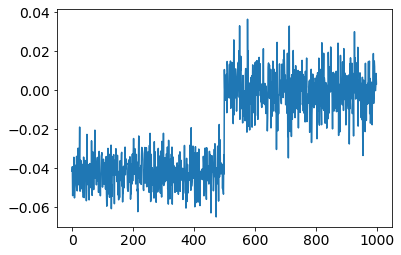

In [ ]:
eigen, vectors = sp.linalg.eigh(B/np.sqrt(n))

plt.plot(np.arange(n), vectors[:,n-1])
plt.show()

# Cas homogène

In [ ]:
q0 = 1/np.sqrt(2)
c0 = 0.5
M0 = 2

In [ ]:
q0_tilde = q0 * np.sqrt(1 - q0**2)
print(q0_tilde)

0.5


In [ ]:
(q0/np.sqrt(1-q0**2))*c0*M0

0.9999999999999999

In [ ]:
def gen_A(M, q, P, n=1000):
  A = np.zeros((n,n))

  Q = (P.T * q).T

  C = 1 + M / np.sqrt(n)
  A = np.tril(np.random.binomial(n=1, p=np.clip(Q @ C @ Q.T, 0., 1.)))

  A = A + A.T - np.diag(np.diag(A))

  return A

In [ ]:
def gen_simulation(M, q, P, n=1000):
  A = np.zeros((n,n))

  Q = (P.T * q).T

  C = 1 + M / np.sqrt(n)
  A = np.tril(np.random.binomial(n=1, p=np.clip(Q @ C @ Q.T, 0., 1.)))

  A = A + A.T - np.diag(np.diag(A))

  B = ( A - q.reshape(-1,1) @ q.reshape(1, -1) )
  return B

In [ ]:
def circle_law(x, q0_tilde):
  return np.sqrt((2*q0_tilde)**2 - x**2)/(2*np.pi*(q0_tilde)**2)

In [ ]:
n = 1500
K = 3
c = np.array([c0, (1-c0)/2, (1-c0)/2])
M = np.diag([M0, 0, 0])
classes = np.concatenate(([0]*(int(c[0]*n)),[1]*(int(c[1]*n)),[2]*(n - int(c[0]*n) - int(c[1]*n))))
P = np.zeros((classes.size, K))
P[np.arange(classes.size), classes] = 1

q = np.ones(n) * q0

B = gen_simulation(M, q, P, n)

eigens = sp.linalg.eigh(B/np.sqrt(n), eigvals_only=True)

In [ ]:
print(np.min(eigens), np.max(eigens))

-1.0007381340933081 0.9850849939617513


In [ ]:
plt.rcParams.update({'font.size': 18})

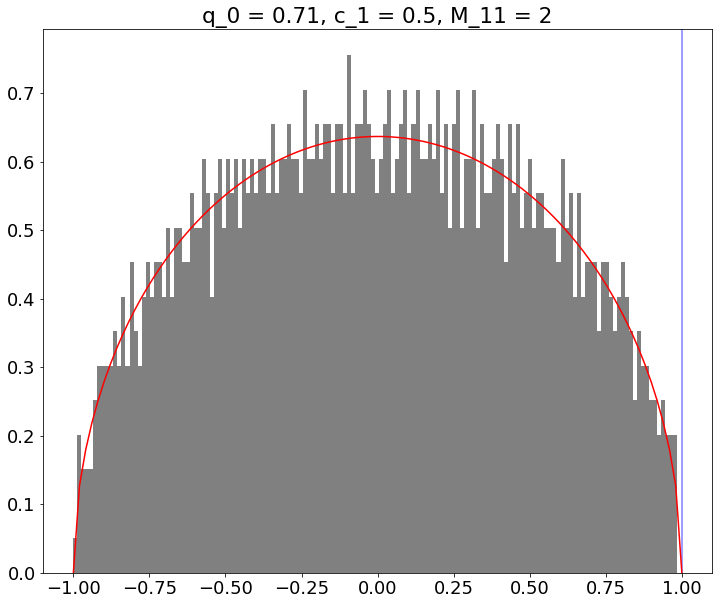

In [ ]:
fig,ax = plt.subplots(figsize=(12,10))
plt.axvline(q0**2 * c0 * M0 + (1-q0**2)/(c0*M0), color='blue', alpha=0.5)
ax.hist(eigens, bins=150, density=True, color='gray')
plt.plot(np.linspace(-2*q0_tilde, 2*q0_tilde, 100), circle_law(np.linspace(-2*q0_tilde, 2*q0_tilde, 100), q0_tilde), c='red') # Loi du demi-cercle

ax.set_title("q_0 = {}, c_1 = {}, M_11 = {}".format(round(q0, 2), c0, M0))
plt.show()

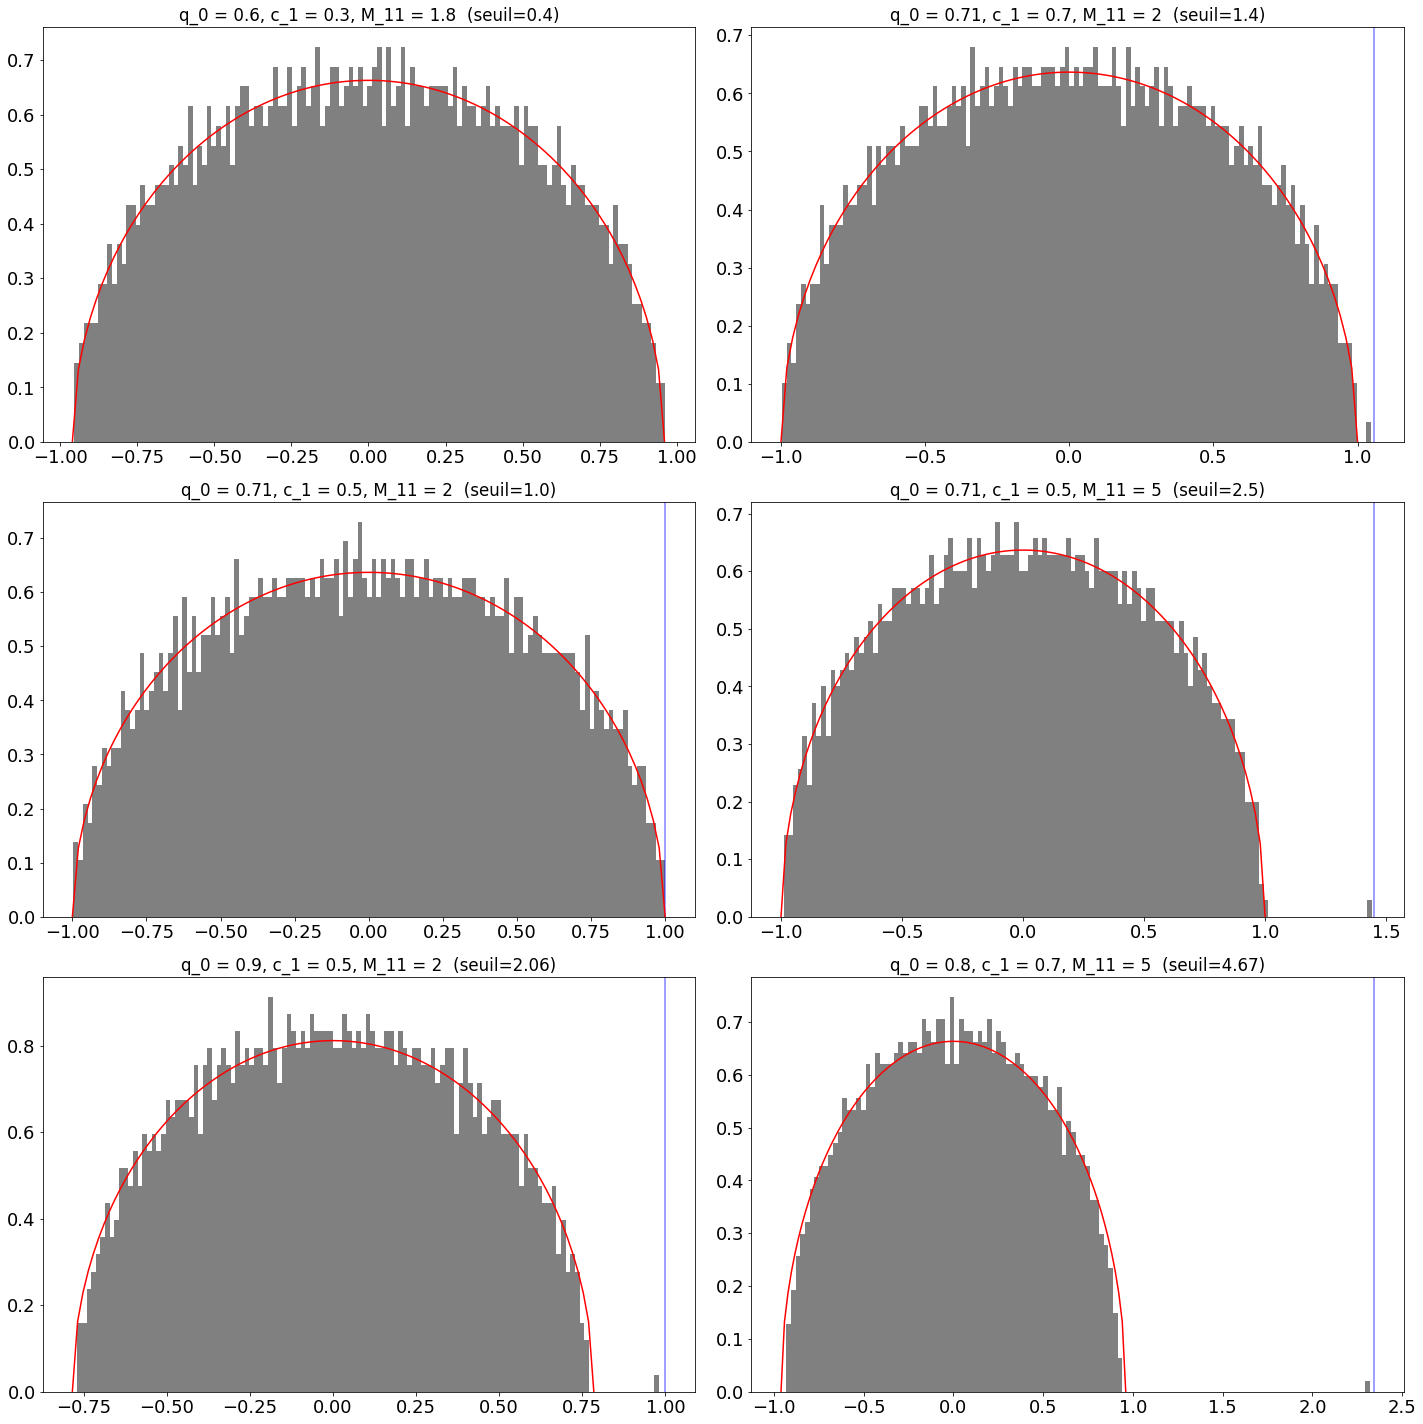

In [ ]:
n = 1800
K = 3

fig, axes = plt.subplots(3, 2, figsize=(20,20))
plt.rcParams.update({'font.size': 14})

for i, (q0, c0, M0) in enumerate([(0.6, 0.3, 1.8), (1/np.sqrt(2), 0.5, 2), (0.9, 0.5, 2), (1/np.sqrt(2), 0.7, 2), (1/np.sqrt(2), 0.5, 5), (0.8, 0.7, 5)]):
  ax = axes[i%3, i // 3]
  q0_tilde = q0 * np.sqrt(1 - q0**2)
  (q0/np.sqrt(1-q0**2))*c0*M0

  c = np.array([c0, (1-c0)/2, (1-c0)/2])
  M = np.diag([M0, 0, 0])
  classes = np.concatenate(([0]*(int(c[0]*n)),[1]*(int(c[1]*n)),[2]*(n - int(c[0]*n) - int(c[1]*n))))

  P = np.zeros((classes.size, K))
  P[np.arange(classes.size), classes] = 1

  q = np.ones(n) * q0

  B = gen_simulation(M, q, P, n)

  eigens = sp.linalg.eigh(B/np.sqrt(n), eigvals_only=True)

  if (q0/np.sqrt(1-q0**2)) > 0.99:
      ax.axvline(q0**2 * c0 * M0 + (1-q0**2)/(c0*M0), color='blue', alpha=0.5)

  ax.hist(eigens, bins=125, density=True, color='gray')
  ax.plot(np.linspace(-2*q0_tilde, 2*q0_tilde, 100), circle_law(np.linspace(-2*q0_tilde, 2*q0_tilde, 100), q0_tilde), c='red') # Loi du demi-cercle

  ax.set_title("q_0 = {}, c_1 = {}, M_11 = {}  (seuil={})".format(round(q0, 2), c0, M0, round((q0/np.sqrt(1-q0**2))*c0*M0, 2)))

plt.tight_layout()
plt.show()

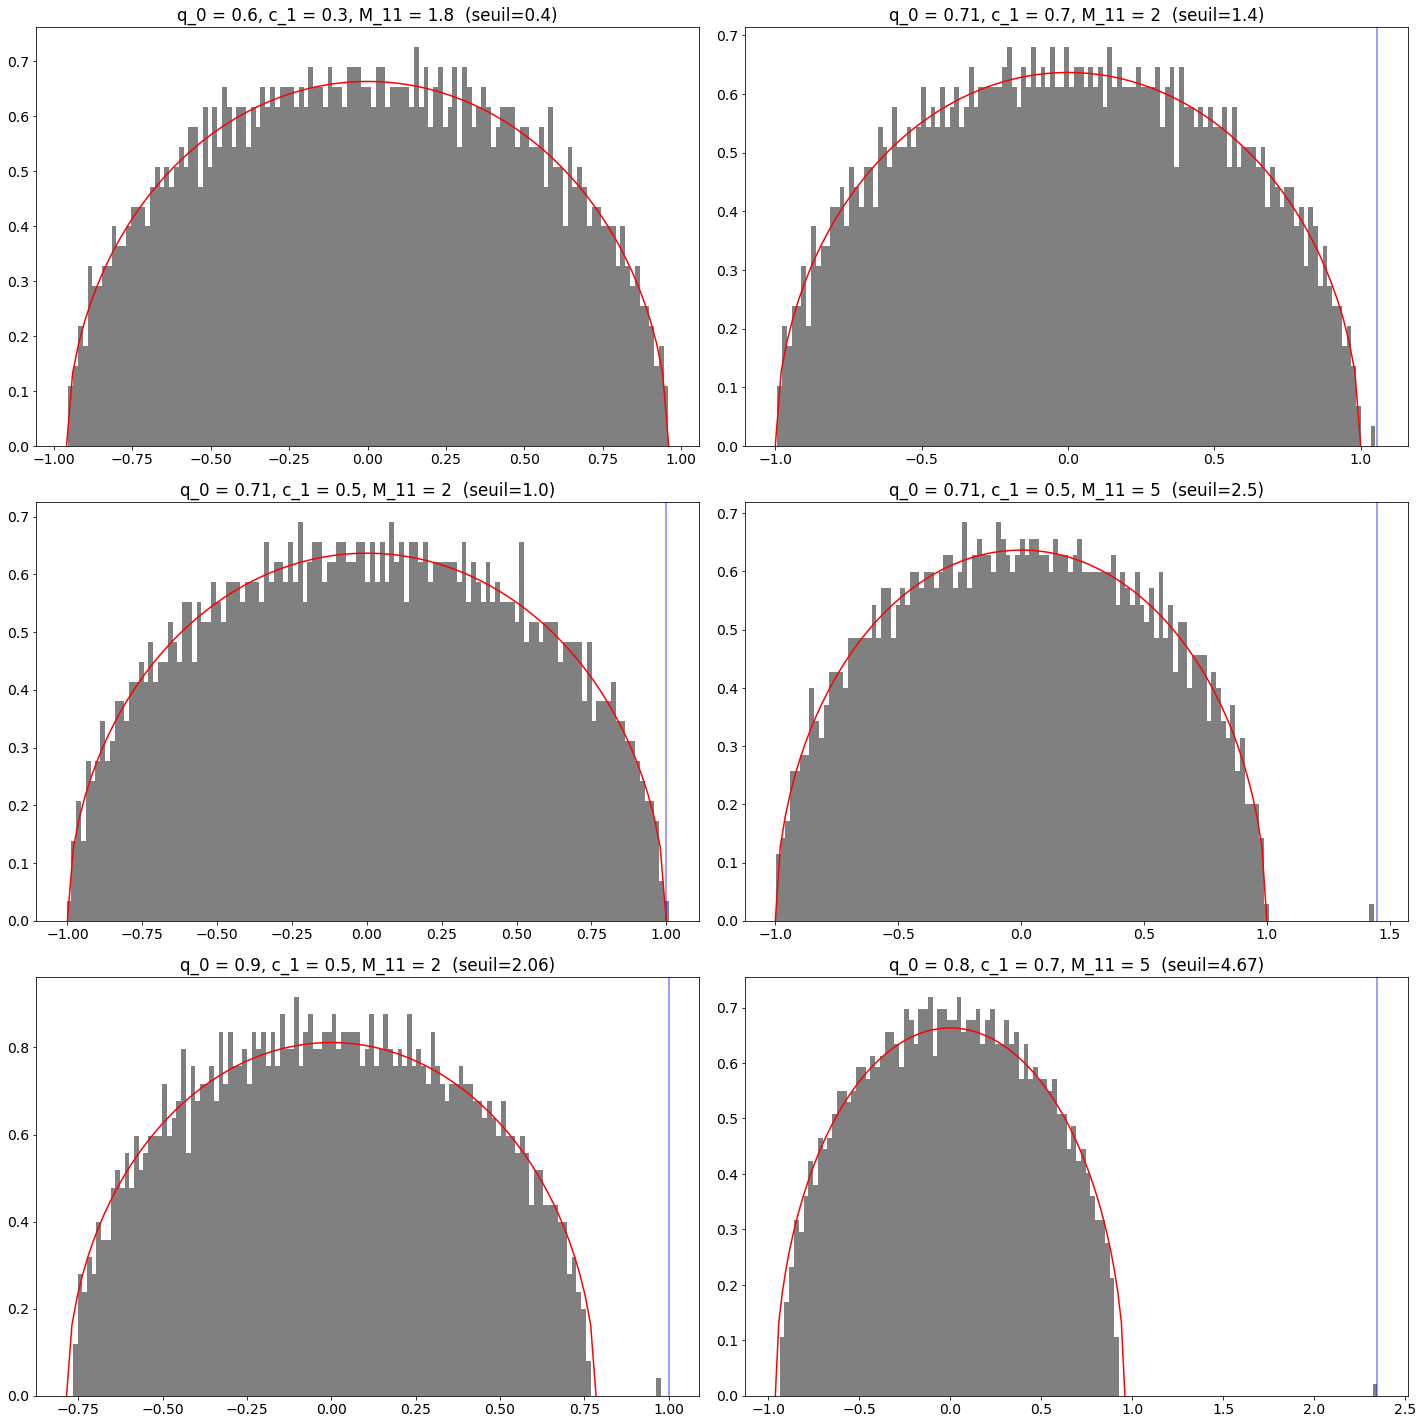

In [ ]:
n = 1800
K = 2

fig, axes = plt.subplots(3, 2, figsize=(20,20))
plt.rcParams.update({'font.size': 14})

for i, (q0, c0, M0) in enumerate([(0.6, 0.3, 1.8), (1/np.sqrt(2), 0.5, 2), (0.9, 0.5, 2), (1/np.sqrt(2), 0.7, 2), (1/np.sqrt(2), 0.5, 5), (0.8, 0.7, 5)]):
  ax = axes[i%3, i // 3]
  q0_tilde = q0 * np.sqrt(1 - q0**2)
  (q0/np.sqrt(1-q0**2))*c0*M0

  c = np.array([c0, 1-c0])
  M = np.diag([M0, 0])
  classes = np.concatenate(([0]*(int(c[0]*n)),[1]*(int(c[1]*n))))

  P = np.zeros((classes.size, K))
  P[np.arange(classes.size), classes] = 1

  q = np.ones(n) * q0

  B = gen_simulation(M, q, P, n)

  eigens = sp.linalg.eigh(B/np.sqrt(n), eigvals_only=True)

  if (q0/np.sqrt(1-q0**2)) > 0.99:
      ax.axvline(q0**2 * c0 * M0 + (1-q0**2)/(c0*M0), color='blue', alpha=0.5)

  ax.hist(eigens, bins=125, density=True, color='gray')
  ax.plot(np.linspace(-2*q0_tilde, 2*q0_tilde, 100), circle_law(np.linspace(-2*q0_tilde, 2*q0_tilde, 100), q0_tilde), c='red') # Loi du demi-cercle

  ax.set_title("q_0 = {}, c_1 = {}, M_11 = {}  (seuil={})".format(round(q0, 2), c0, M0, round((q0/np.sqrt(1-q0**2))*c0*M0, 2)))

plt.tight_layout()
plt.show()

In [ ]:
K = 2
q0 = 0.9
c0 = 0.5
M0 = 2

q0_tilde = q0 * np.sqrt(1 - q0**2)
(q0/np.sqrt(1-q0**2))*c0*M0

c = np.array([c0, 1 - c0])
M = np.diag([M0, 0])
classes = np.concatenate(([0]*(int(c[0]*n)),[1]*(int(c[1]*n))))

P = np.zeros((classes.size, K))
P[np.arange(classes.size), classes] = 1

q = np.ones(n) * q0

B = gen_simulation(M, q, P, n)

eigen, vectors = sp.linalg.eigh(B/np.sqrt(n), subset_by_index=[n-1, n-1])

In [ ]:
(P[:, 0].dot(vectors))**2 / np.sum(P[:, 0])

array([0.77133113])

i=0
n=10
n=20
n=30
n=40
n=50
n=60
n=70
n=80
n=90
n=100
n=110
n=120
n=130
n=140
n=150
n=160
n=170
n=180
n=190
n=200
n=210
n=220
n=230
n=240
n=250
n=260
n=270
n=280
n=290
n=300
n=310
n=320
n=330
n=340
n=350
n=360
n=370
n=380
n=390
n=400
n=410
n=420
n=430
n=440
n=450
n=460
n=470
n=480
n=490
n=500
n=510
n=520
n=530
n=540
n=550
n=560
n=570
n=580
n=590
n=600
n=610
n=620
n=630
n=640
n=650
n=660
n=670
n=680
n=690
n=700
n=710
n=720
n=730
n=740
n=750
n=760
n=770
n=780
n=790
n=800
n=810
n=820
n=830
n=840
n=850
n=860
n=870
n=880
n=890
n=900
n=910
n=920
n=930
n=940
n=950
n=960
n=970
n=980
n=990
n=1000
n=1010
n=1020
n=1030
n=1040
n=1050
n=1060
n=1070
n=1080
n=1090
n=1100
n=1110
n=1120
n=1130
n=1140
n=1150
n=1160
n=1170
n=1180
n=1190
n=1200
n=1210
n=1220
n=1230
n=1240
n=1250
n=1260
n=1270
n=1280
n=1290
n=1300
n=1310
n=1320
n=1330
n=1340
n=1350
n=1360
n=1370
n=1380
n=1390
n=1400
n=1410
n=1420
n=1430
n=1440
n=1450
n=1460
n=1470
n=1480
n=1490
n=1500
n=1510
n=1520
n=1530
n=1540
n=1550
n=1560
n=1570
n=158

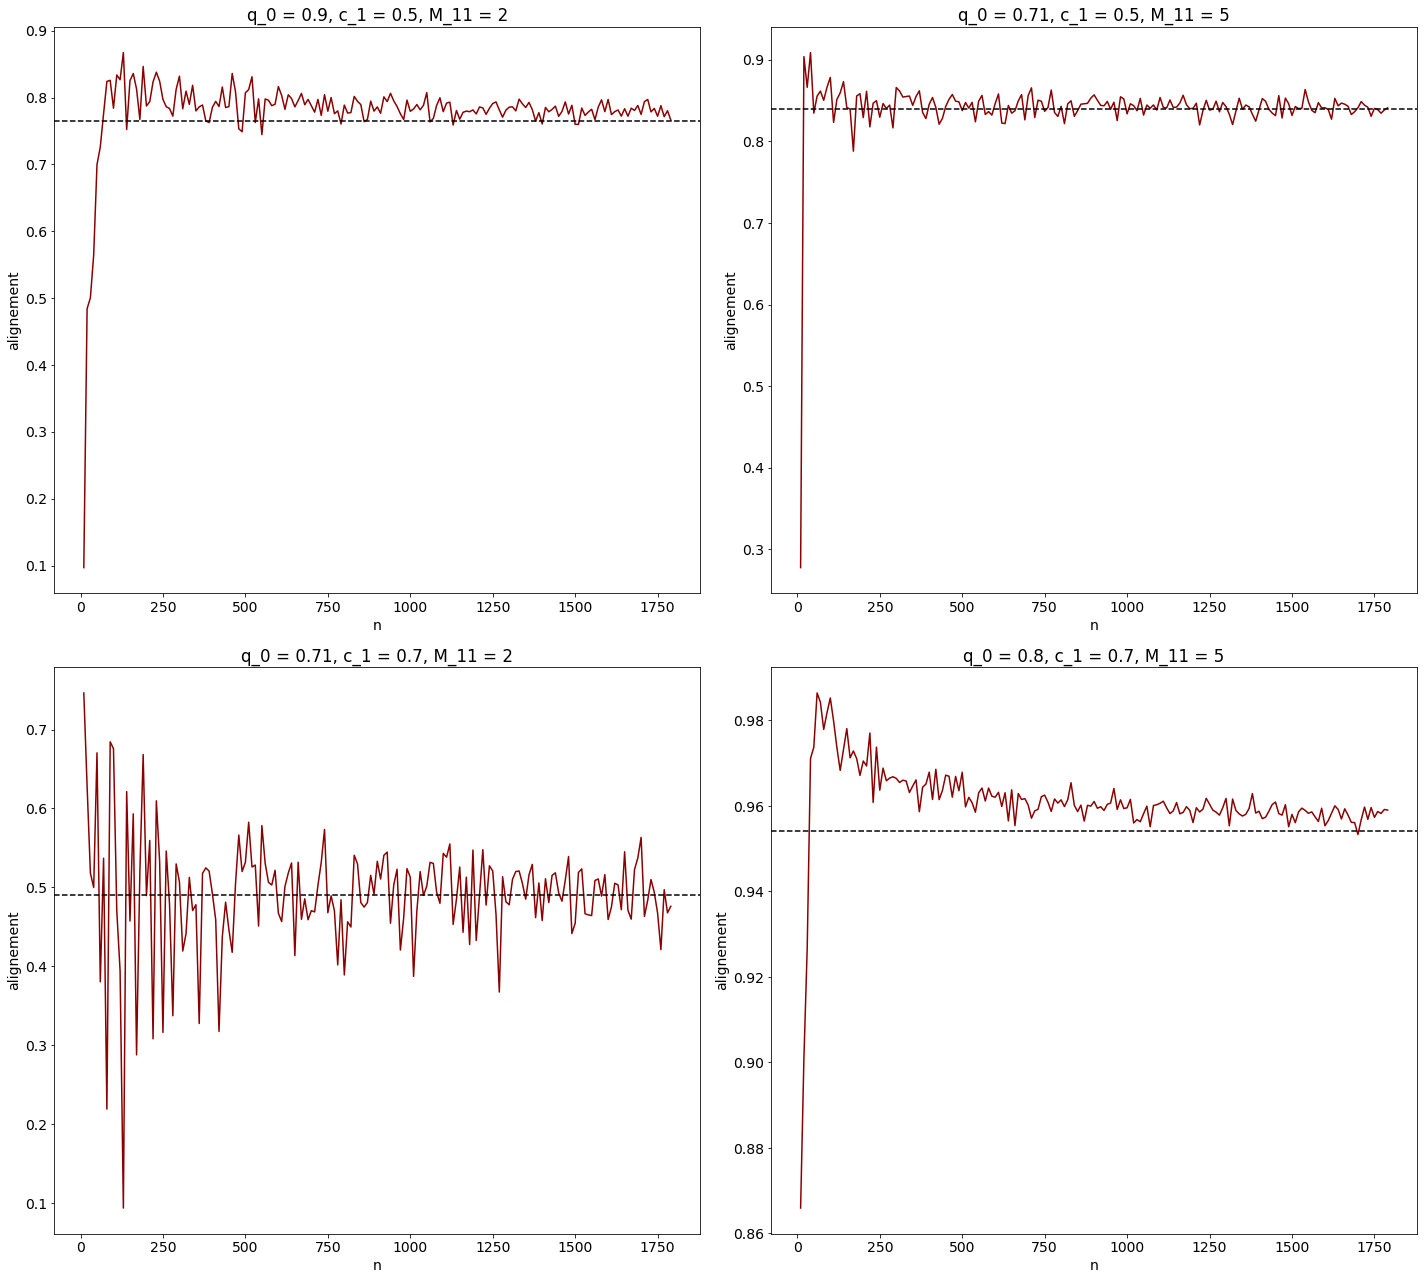

In [ ]:
K = 2

fig, axes = plt.subplots(2, 2, figsize=(20,18))
plt.rcParams.update({'font.size': 14})

n_range = range(10, 1800, 10)

for i, (q0, c0, M0) in enumerate([(0.9, 0.5, 2), (1/np.sqrt(2), 0.7, 2), (1/np.sqrt(2), 0.5, 5), (0.8, 0.7, 5)]):
  print("i={}".format(i))
  ax = axes[i%2, i // 2]
  q0_tilde = q0 * np.sqrt(1 - q0**2)
  (q0/np.sqrt(1-q0**2))*c0*M0

  c = np.array([c0, 1 - c0])
  M = np.diag([M0, 0])

  alignements = list()

  for n in n_range:
    print('n={}'.format(n))
    classes = np.concatenate(([0]*(int(c[0]*n)),[1]*(n - int(c[0]*n))))

    P = np.zeros((classes.size, K))
    P[np.arange(classes.size), classes] = 1

    q = np.ones(n) * q0

    B = gen_simulation(M, q, P, n)

    eigen, vectors = sp.linalg.eigh(B/np.sqrt(n), subset_by_index=[n-1, n-1])

    alignements.append((P[:, 0].dot(vectors))**2 / np.sum(P[:, 0]))

  ax.plot(n_range, alignements, c='darkred')
  ax.axhline(1 - (1 - q0**2)/(q0**2 * c0**2 * M0**2), c='black', linestyle='--')
  ax.set_xlabel("n")
  ax.set_ylabel("alignement")
  ax.set_title("q_0 = {}, c_1 = {}, M_11 = {}".format(round(q0, 2), c0, M0))

plt.tight_layout()
plt.show()

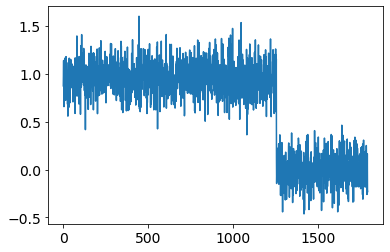

In [ ]:
plt.plot(range(n), vectors*np.sum(vectors))

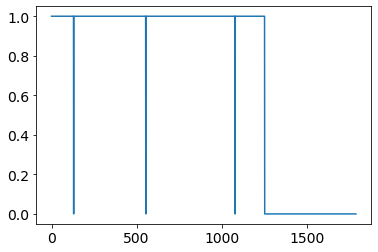

In [ ]:
plt.plot(range(n), np.round(np.clip(vectors*np.sum(vectors), 0, 1)))

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
def clustering(A, K=2):
  """
    A = matrice d'adjacence du graphe
    K = nombre de classes à identifier
  """

  n = A.shape[0]

  q = np.mean(A, axis=1)
  B = ( A - q.reshape(-1,1) @ q.reshape(1, -1) )
  eigen, vectors = sp.linalg.eigh(B/np.sqrt(n), subset_by_index=[n-K+1, n-1])

  classes = KMeans(n_clusters=K, n_init='auto').fit_predict(vectors)
  return classes

In [ ]:
n = 100
q0 = 0.5
c0 = 0.5
M0 = 7

q0_tilde = q0 * np.sqrt(1 - q0**2)
(q0/np.sqrt(1-q0**2))*c0*M0

c = np.array([c0, 1 - c0])
M = np.diag([M0, 0])

classes = np.concatenate(([0]*(int(c[0]*n)),[1]*(n - int(c[0]*n))))

P = np.zeros((classes.size, K))
P[np.arange(classes.size), classes] = 1

q = np.ones(n) * q0

A = gen_A(M, q, P, n=n)

classes_pred = clustering(A)

In [ ]:
(q0/np.sqrt(1-q0**2))*c0*M0

2.0207259421636903

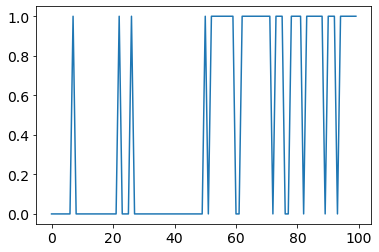

In [ ]:
plt.plot(range(n), classes_pred)

In [ ]:
from sklearn.metrics import rand_score

In [ ]:
rand_score(classes, classes_pred)

0.7866666666666666

In [ ]:
1 - (1 - q0**2)/(q0**2 * c0**2 * M0**2)

0.7551020408163265

i=0
n=10
n=20
n=30
n=40
n=50
n=60
n=70
n=80
n=90
n=100
n=110
n=120
n=130
n=140
n=150
n=160
n=170
n=180
n=190
n=200
n=210
n=220
n=230
n=240
n=250
n=260
n=270
n=280
n=290
n=300
n=310
n=320
n=330
n=340
n=350
n=360
n=370
n=380
n=390
n=400
n=410
n=420
n=430
n=440
n=450
n=460
n=470
n=480
n=490
n=500
n=510
n=520
n=530
n=540
n=550
n=560
n=570
n=580
n=590
n=600
n=610
n=620
n=630
n=640
n=650
n=660
n=670
n=680
n=690
n=700
n=710
n=720
n=730
n=740
n=750
n=760
n=770
n=780
n=790
n=800
n=810
n=820
n=830
n=840
n=850
n=860
n=870
n=880
n=890
n=900
n=910
n=920
n=930
n=940
n=950
n=960
n=970
n=980
n=990
n=1000
n=1010
n=1020
n=1030
n=1040
n=1050
n=1060
n=1070
n=1080
n=1090
n=1100
n=1110
n=1120
n=1130
n=1140
n=1150
n=1160
n=1170
n=1180
n=1190
n=1200
n=1210
n=1220
n=1230
n=1240
n=1250
n=1260
n=1270
n=1280
n=1290
n=1300
n=1310
n=1320
n=1330
n=1340
n=1350
n=1360
n=1370
n=1380
n=1390
n=1400
n=1410
n=1420
n=1430
n=1440
n=1450
n=1460
n=1470
n=1480
n=1490
n=1500
n=1510
n=1520
n=1530
n=1540
n=1550
n=1560
n=1570
n=158

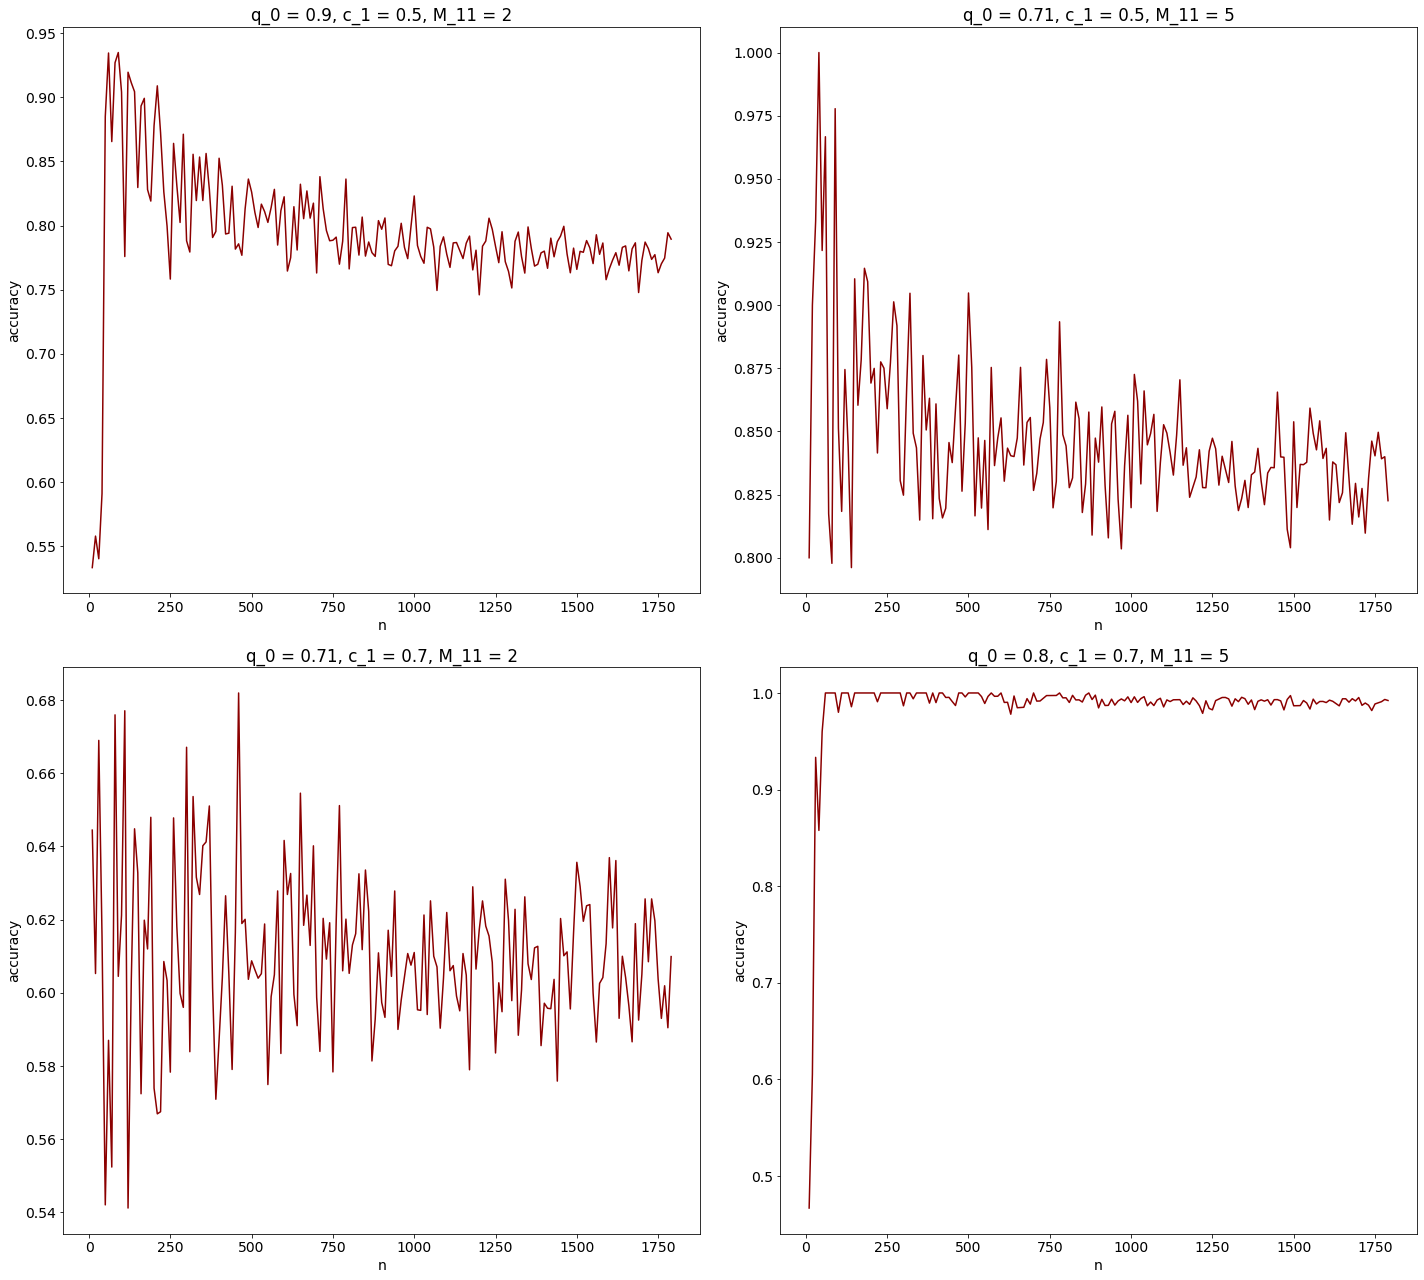

In [ ]:
K = 2

fig, axes = plt.subplots(2, 2, figsize=(20,18))
plt.rcParams.update({'font.size': 14})

n_range = range(10, 1800, 10)

for i, (q0, c0, M0) in enumerate([(0.9, 0.5, 2), (1/np.sqrt(2), 0.7, 2), (1/np.sqrt(2), 0.5, 5), (0.8, 0.7, 5)]):
  print("i={}".format(i))
  ax = axes[i%2, i // 2]
  q0_tilde = q0 * np.sqrt(1 - q0**2)
  (q0/np.sqrt(1-q0**2))*c0*M0

  c = np.array([c0, 1 - c0])
  M = np.diag([M0, 0])

  accuracies = list()

  for n in n_range:
    print('n={}'.format(n))
    classes = np.concatenate(([0]*(int(c[0]*n)),[1]*(n - int(c[0]*n))))

    P = np.zeros((classes.size, K))
    P[np.arange(classes.size), classes] = 1

    q = np.ones(n) * q0

    A = gen_A(M, q, P, n=n)

    classes_pred = clustering(A)
    accuracies.append(rand_score(classes, classes_pred))

  ax.plot(n_range, accuracies, c='darkred')
  # ax.axhline(1 - (1 - q0**2)/(q0**2 * c0**2 * M0**2), c='black', linestyle='--')
  ax.set_xlabel("n")
  ax.set_ylabel("accuracy")
  ax.set_title("q_0 = {}, c_1 = {}, M_11 = {}".format(round(q0, 2), c0, M0))

plt.tight_layout()
plt.show()

In [ ]:
n = 1800
q0 = 0.8
c0 = 0.7
M0 = 5

accuracies = list()
q1_range = np.linspace(0.1, 1, 250)

for i, q1 in enumerate(q1_range):
  print(i)

  c = np.array([c0, 1 - c0])
  M = np.diag([M0, 0])

  classes = np.concatenate(([0]*(int(c[0]*n)),[1]*(n - int(c[0]*n))))

  P = np.zeros((classes.size, K))
  P[np.arange(classes.size), classes] = 1

  U = np.random.binomial(n=1, p=0.5, size=n)
  q = U * q0 + (1-U)*q1

  A = gen_A(M, q, P, n=n)

  classes_pred = clustering(A)
  accuracies.append(rand_score(classes, classes_pred))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249


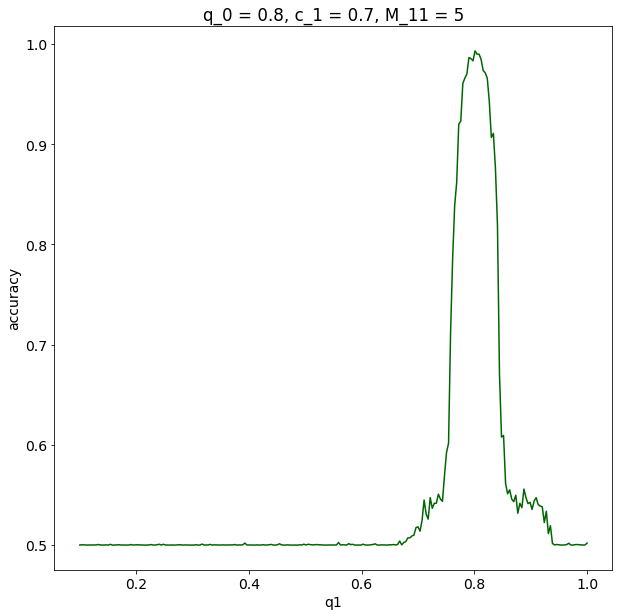

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_title("q_0 = {}, c_1 = {}, M_11 = {}".format(round(q0, 2), c0, M0))
ax.plot(q1_range, accuracies, c='darkgreen')
ax.set_xlabel('q1')
ax.set_ylabel('accuracy')
plt.show()

In [ ]:
def clustering_normalized(A, K=2):
  """
    A = matrice d'adjacence du graphe
    K = nombre de classes à identifier
  """

  n = A.shape[0]

  q = np.mean(A, axis=1)
  B = ( A - q.reshape(-1,1) @ q.reshape(1, -1) )

  B = np.diag(1/q) @ B @ np.diag(1/q)
  eigen, vectors = sp.linalg.eigh(B/np.sqrt(n), subset_by_index=[n-K+1, n-1])

  classes = KMeans(n_clusters=K, n_init='auto').fit_predict(vectors)
  return classes

In [ ]:
def clustering_vector_normalized(A, K=2):
  """
    A = matrice d'adjacence du graphe
    K = nombre de classes à identifier
  """

  n = A.shape[0]

  q = np.mean(A, axis=1)
  B = ( A - q.reshape(-1,1) @ q.reshape(1, -1) )

  eigen, vectors = sp.linalg.eigh(B/np.sqrt(n), subset_by_index=[n-K+1, n-1])

  vectors = np.diag(1/q) @ vectors

  classes = KMeans(n_clusters=K, n_init='auto').fit_predict(vectors)
  return classes

In [ ]:
from sklearn import cluster
n = 1000
q0 = 0.8
c0 = 0.7
M0 = 5

accuracies_base = list()
accuracies_normalized = list()
accuracies_vectornormalized = list()

q1_range = np.linspace(0.1, 1, 250)

for i, q1 in enumerate(q1_range):
  print(i)

  c = np.array([c0, 1 - c0])
  M = np.diag([M0, 0])

  classes = np.concatenate(([0]*(int(c[0]*n)),[1]*(n - int(c[0]*n))))

  P = np.zeros((classes.size, K))
  P[np.arange(classes.size), classes] = 1

  U = np.random.binomial(n=1, p=0.5, size=n)
  q = U * q0 + (1-U)*q1

  A = gen_A(M, q, P, n=n)

  classes_pred_base = clustering(A)
  classes_pred_normalized = clustering_normalized(A)
  classes_pred_vector_normalized = clustering_vector_normalized(A)

  accuracies_base.append(rand_score(classes, classes_pred_base))
  accuracies_normalized.append(rand_score(classes, classes_pred_normalized))
  accuracies_vectornormalized.append(rand_score(classes, classes_pred_vector_normalized))

  print(q1, round(accuracies_base[-1],2), round(accuracies_normalized[-1],2), round(accuracies_vectornormalized[-1],2))

0
0.1 0.5 0.56 0.53
1
0.10361445783132531 0.5 0.55 0.52
2
0.10722891566265061 0.5 0.55 0.53
3
0.11084337349397591 0.5 0.54 0.52
4
0.11445783132530121 0.5 0.53 0.5
5
0.11807228915662651 0.5 0.52 0.51
6
0.12168674698795182 0.5 0.53 0.52
7
0.12530120481927712 0.5 0.52 0.5
8
0.12891566265060242 0.5 0.53 0.51
9
0.13253012048192772 0.5 0.54 0.53
10
0.13614457831325302 0.5 0.53 0.52
11
0.13975903614457832 0.5 0.54 0.51
12
0.14337349397590363 0.5 0.54 0.51
13
0.14698795180722893 0.5 0.53 0.51
14
0.15060240963855423 0.5 0.5 0.5
15
0.15421686746987953 0.5 0.52 0.5
16
0.15783132530120483 0.5 0.52 0.51
17
0.16144578313253014 0.5 0.51 0.5
18
0.1650602409638554 0.5 0.51 0.51
19
0.1686746987951807 0.5 0.5 0.5
20
0.172289156626506 0.5 0.52 0.5
21
0.17590361445783131 0.5 0.52 0.51
22
0.17951807228915662 0.5 0.51 0.5
23
0.18313253012048192 0.5 0.51 0.5
24
0.18674698795180722 0.5 0.51 0.5
25
0.19036144578313252 0.5 0.51 0.5
26
0.19397590361445782 0.5 0.5 0.5
27
0.19759036144578312 0.5 0.52 0.5
28
0.20120

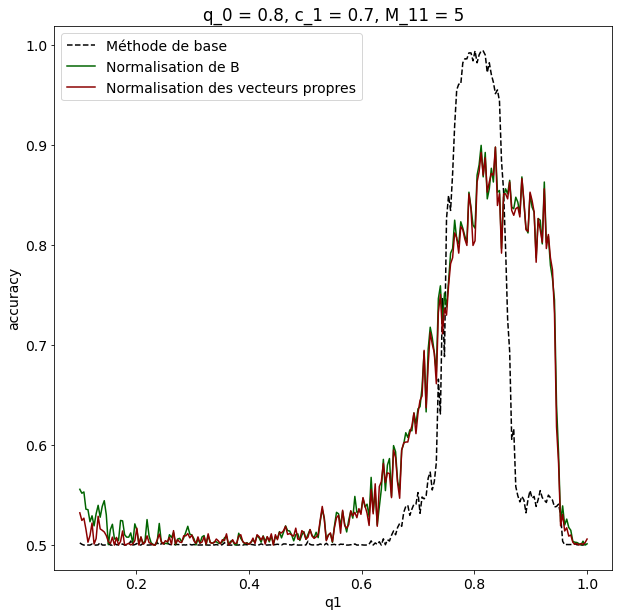

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_title("q_0 = {}, c_1 = {}, M_11 = {}".format(round(q0, 2), c0, M0))
ax.plot(q1_range, accuracies_base, c='black', linestyle='--', label='Méthode de base')
ax.plot(q1_range, accuracies_normalized, c='darkgreen', label='Normalisation de B')
ax.plot(q1_range, accuracies_vectornormalized, c='darkred', label='Normalisation des vecteurs propres')
ax.set_xlabel('q1')
ax.set_ylabel('accuracy')
ax.legend()
plt.show()